In [107]:
import pandas as pd 
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

[]

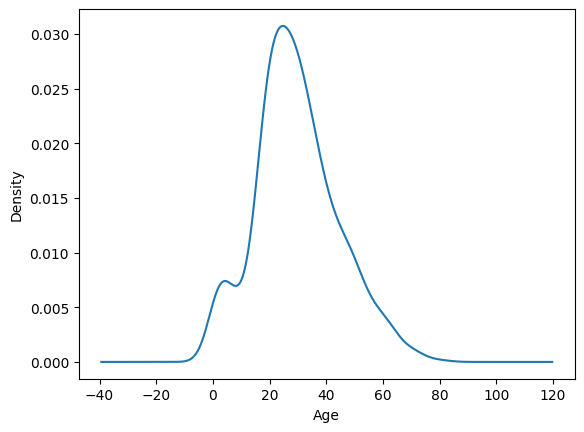

In [109]:
import matplotlib.pyplot as plt
data['Age'].plot(kind='density')
plt.xlabel("Age")
plt.plot()

[]

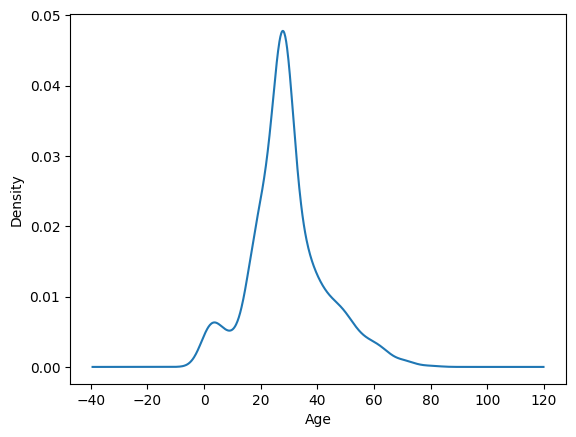

In [110]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Age'].plot(kind='density')
plt.xlabel("Age")
plt.plot()

In [111]:
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\berka\AppData\Local\Temp\ipykernel_7028\3631850816.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


C:\Users\berka\AppData\Local\Temp\ipykernel_7028\1556685620.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'][data.Survived == 1 ], color='blue', shade=True)
C:\Users\berka\AppData\Local\Temp\ipykernel_7028\1556685620.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'][data.Survived == 0], color='red', shade=True)


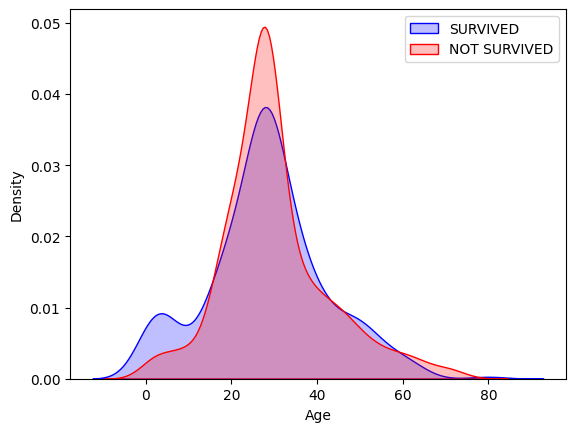

In [112]:
import seaborn as sns
sns.kdeplot(data['Age'][data.Survived == 1 ], color='blue', shade=True)
sns.kdeplot(data['Age'][data.Survived == 0], color='red', shade=True)
plt.legend(["SURVIVED", "NOT SURVIVED"])

In [113]:
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4
data.drop(columns=['AgeBand'], inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S


In [114]:
import numpy as np

data['IsAlone'] = np.where((data['SibSp'] + data['Parch']) > 0,0,1)
data.drop(columns=['SibSp', 'Parch'], inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,373450,8.0500,NaN,S,1


<BarContainer object of 3 artists>

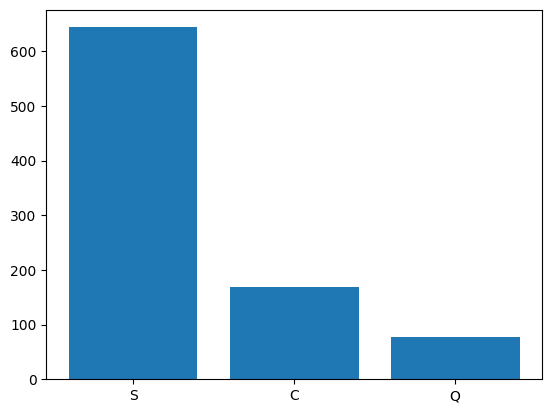

In [115]:
embarked_values = data['Embarked'].value_counts()
plt.bar(embarked_values.index ,embarked_values)

In [116]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].isnull().sum()

np.int64(0)

In [117]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

embarked_encoded = ohe.fit_transform(data.iloc[:, 9:10].values).toarray()
embarked_encoded = pd.DataFrame(data=embarked_encoded, columns=['Embarked Q', 'Embarked S'])
data.drop(columns=['Embarked'], inplace=True)
data = pd.concat([data, embarked_encoded], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,IsAlone,Embarked Q,Embarked S
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,A/5 21171,7.2500,NaN,0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,PC 17599,71.2833,C85,0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,STON/O2. 3101282,7.9250,NaN,1,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,113803,53.1000,C123,0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,373450,8.0500,NaN,1,0.0,1.0


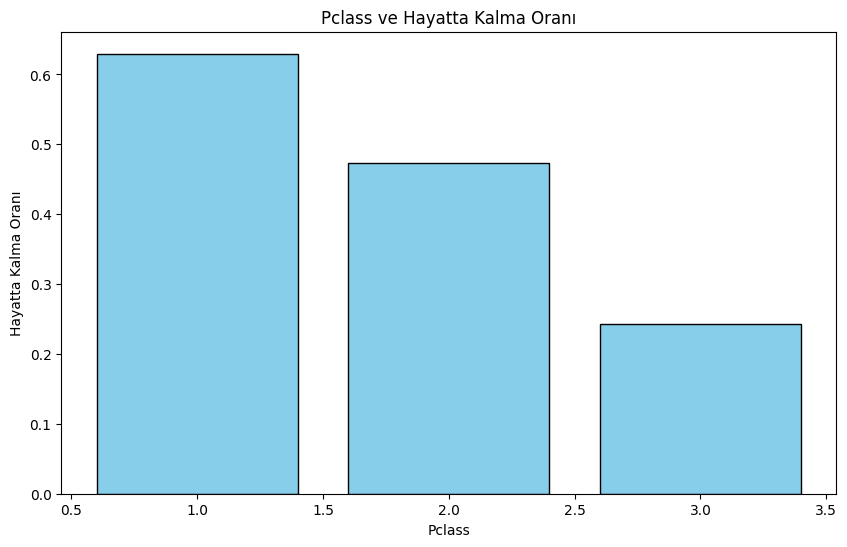

In [118]:
pclass_survival_rate = data.groupby('Pclass')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(pclass_survival_rate['Pclass'], pclass_survival_rate['Survived'], color='skyblue', edgecolor='black')
plt.title('Pclass ve Hayatta Kalma Oranı')
plt.xlabel('Pclass')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

In [119]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first')

pclass_encoded = one_hot_encoder.fit_transform(data.iloc[:, 2:3].values).toarray()
pclass_encoded = pd.DataFrame(data=pclass_encoded, columns=['PC2', 'PC3'])
data.drop(columns=['Pclass'], inplace=True)
data = pd.concat([data, pclass_encoded],axis=1)
data.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,IsAlone,Embarked Q,Embarked S,PC2,PC3
0,1,0,"Braund, Mr. Owen Harris",male,1.0,A/5 21171,7.2500,NaN,0,0.0,1.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,PC 17599,71.2833,C85,0,0.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",female,1.0,STON/O2. 3101282,7.9250,NaN,1,0.0,1.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,113803,53.1000,C123,0,0.0,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",male,2.0,373450,8.0500,NaN,1,0.0,1.0,0.0,1.0


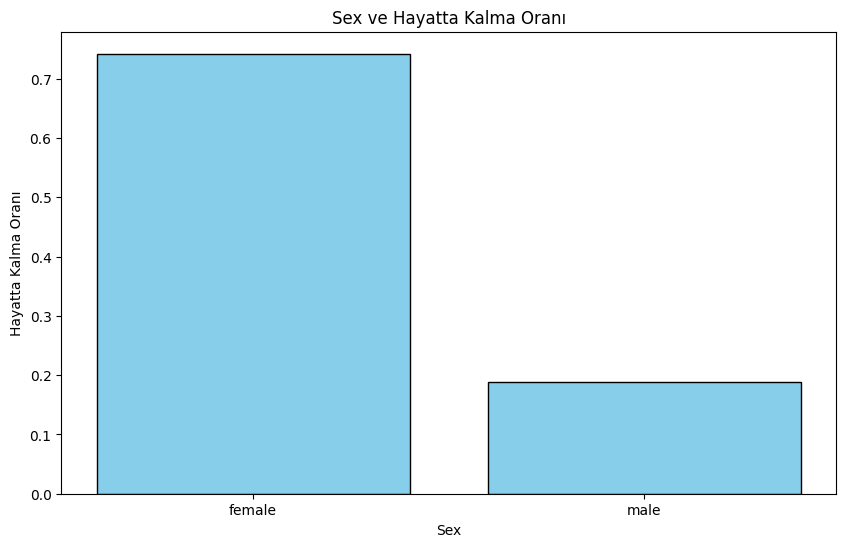

In [120]:
sex_survival_rate = data.groupby('Sex')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(sex_survival_rate['Sex'], sex_survival_rate['Survived'], color='skyblue', edgecolor='black')
plt.title('Sex ve Hayatta Kalma Oranı')
plt.xlabel('Sex')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

In [121]:
sex_mapping = ({'female':1, 'male':0})
data['Sex'] = data['Sex'].map(sex_mapping)
data.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,IsAlone,Embarked Q,Embarked S,PC2,PC3
0,1,0,"Braund, Mr. Owen Harris",0,1.0,A/5 21171,7.2500,NaN,0,0.0,1.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,PC 17599,71.2833,C85,0,0.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",1,1.0,STON/O2. 3101282,7.9250,NaN,1,0.0,1.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,113803,53.1000,C123,0,0.0,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",0,2.0,373450,8.0500,NaN,1,0.0,1.0,0.0,1.0


In [122]:
data.drop(columns=['PassengerId', 'Cabin'], inplace=True)
data.head()

,Survived,Name,Sex,Age,Ticket,Fare,IsAlone,Embarked Q,Embarked S,PC2,PC3
0,0,"Braund, Mr. Owen Harris",0,1.0,A/5 21171,7.2500,0,0.0,1.0,0.0,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,PC 17599,71.2833,0,0.0,0.0,0.0,0.0
2,1,"Heikkinen, Miss. Laina",1,1.0,STON/O2. 3101282,7.9250,1,0.0,1.0,0.0,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,113803,53.1000,0,0.0,1.0,0.0,0.0
4,0,"Allen, Mr. William Henry",0,2.0,373450,8.0500,1,0.0,1.0,0.0,1.0


In [123]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data.drop(columns=['Name'], inplace=True)
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\berka\AppData\Local\Temp\ipykernel_7028\3690471876.py:1: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


,Survived,Sex,Age,Ticket,Fare,IsAlone,Embarked Q,Embarked S,PC2,PC3,Title
0,0,0,1.0,A/5 21171,7.2500,0,0.0,1.0,0.0,1.0,Mr
1,1,1,2.0,PC 17599,71.2833,0,0.0,0.0,0.0,0.0,Mrs
2,1,1,1.0,STON/O2. 3101282,7.9250,1,0.0,1.0,0.0,1.0,Miss
3,1,1,2.0,113803,53.1000,0,0.0,1.0,0.0,0.0,Mrs
4,0,0,2.0,373450,8.0500,1,0.0,1.0,0.0,1.0,Mr


In [124]:
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data.head()

,Survived,Sex,Age,Ticket,Fare,IsAlone,Embarked Q,Embarked S,PC2,PC3,Title
0,0,0,1.0,A/5 21171,7.2500,0,0.0,1.0,0.0,1.0,Mr
1,1,1,2.0,PC 17599,71.2833,0,0.0,0.0,0.0,0.0,Mrs
2,1,1,1.0,STON/O2. 3101282,7.9250,1,0.0,1.0,0.0,1.0,Miss
3,1,1,2.0,113803,53.1000,0,0.0,1.0,0.0,0.0,Mrs
4,0,0,2.0,373450,8.0500,1,0.0,1.0,0.0,1.0,Mr


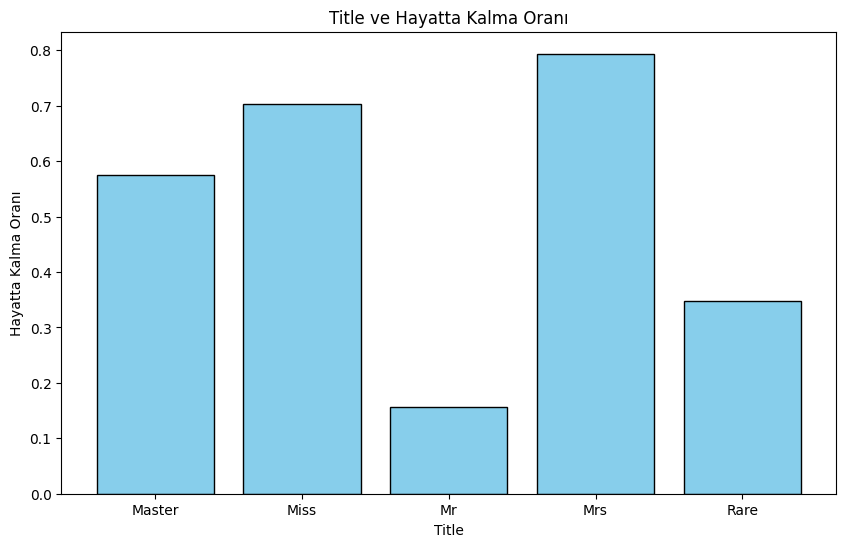

In [125]:
title_survival_rate = data.groupby('Title')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(title_survival_rate['Title'], title_survival_rate['Survived'], color='skyblue', edgecolor='black')
plt.title('Title ve Hayatta Kalma Oranı')
plt.xlabel('Title')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

In [126]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data.drop(columns=['Ticket'], inplace=True)
data.head()

,Survived,Sex,Age,Fare,IsAlone,Embarked Q,Embarked S,PC2,PC3,Title
0,0,0,1.0,7.2500,0,0.0,1.0,0.0,1.0,1
1,1,1,2.0,71.2833,0,0.0,0.0,0.0,0.0,3
2,1,1,1.0,7.9250,1,0.0,1.0,0.0,1.0,2
3,1,1,2.0,53.1000,0,0.0,1.0,0.0,0.0,3
4,0,0,2.0,8.0500,1,0.0,1.0,0.0,1.0,1


In [127]:
print(data.shape)

for column in data.columns:
       
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)

        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data

(891, 10)


,Survived,Sex,Age,Fare,IsAlone,Embarked Q,Embarked S,PC2,PC3,Title
0,0,0,1.0,7.2500,0,0.0,1.0,0.0,1.0,1
2,1,1,1.0,7.9250,1,0.0,1.0,0.0,1.0,2
3,1,1,2.0,53.1000,0,0.0,1.0,0.0,0.0,3
4,0,0,2.0,8.0500,1,0.0,1.0,0.0,1.0,1
6,0,0,3.0,51.8625,1,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
882,0,1,1.0,10.5167,1,0.0,1.0,0.0,1.0,2
883,0,0,1.0,10.5000,1,0.0,1.0,1.0,0.0,1
884,0,0,1.0,7.0500,1,0.0,1.0,0.0,1.0,1
887,1,1,1.0,30.0000,1,0.0,1.0,0.0,0.0,2


In [128]:
cols = ['Sex', "Age","Fare", "Embarked Q", "Embarked S",	"PC2", "PC3", "Title","IsAlone"]
x = data[cols]
y = data['Survived']
x

,Sex,Age,Fare,Embarked Q,Embarked S,PC2,PC3,Title,IsAlone
0,0,1.0,7.2500,0.0,1.0,0.0,1.0,1,0
2,1,1.0,7.9250,0.0,1.0,0.0,1.0,2,1
3,1,2.0,53.1000,0.0,1.0,0.0,0.0,3,0
4,0,2.0,8.0500,0.0,1.0,0.0,1.0,1,1
6,0,3.0,51.8625,0.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...
882,1,1.0,10.5167,0.0,1.0,0.0,1.0,2,1
883,0,1.0,10.5000,0.0,1.0,1.0,0.0,1,1
884,0,1.0,7.0500,0.0,1.0,0.0,1.0,1,1
887,1,1.0,30.0000,0.0,1.0,0.0,0.0,2,1


#knn

Text(6, 0.8196666666666667, 'en uygun n(k):6')

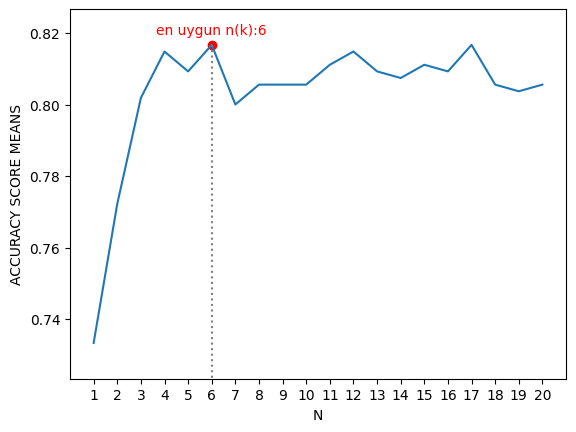

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

ns = list(range(1,21))

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

cv_scores = []

for n in ns:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, x_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_n = ns[np.argmax(cv_scores)]

plt.plot(ns, cv_scores)
plt.xlabel("N")
plt.ylabel("ACCURACY SCORE MEANS")
plt.scatter(x=optimal_n, y=max(cv_scores), color='red')
plt.axis([0,21, min(cv_scores) - 0.01, max(cv_scores)+0.01])
plt.vlines(optimal_n, 0, max(cv_scores), colors='gray', linestyles='dotted', label='İzdüşüm')
plt.xticks(ns)

plt.text(optimal_n, max(cv_scores)+0.003, "en uygun n(k):" + str(optimal_n), fontsize=10, color='red', ha='center')


In [130]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=optimal_n)
knn.fit(x_train, y_train)

train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.8472222222222222
0.8703703703703703


#logistic regression

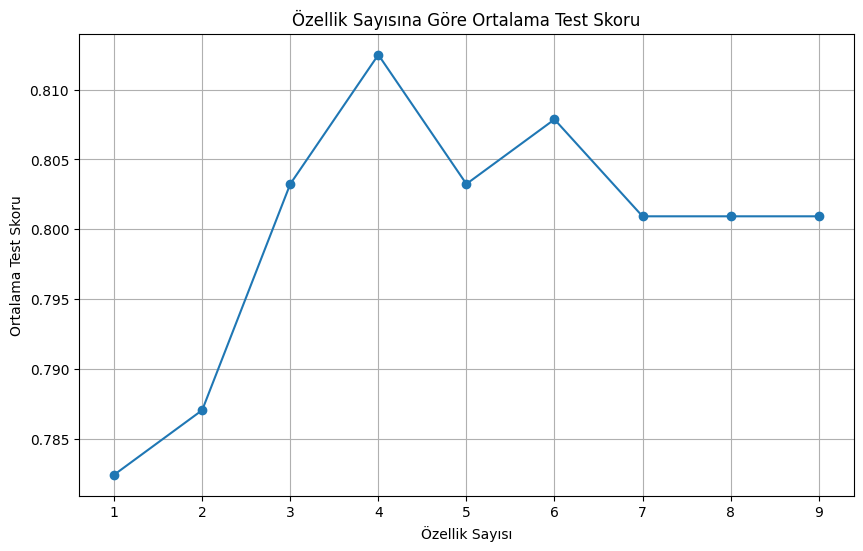

Seçilen Özellikler: Index(['Sex', 'PC2', 'PC3', 'Title'], dtype='object')
0.8217592592592593
0.8333333333333334


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression()

selector = RFECV(estimator=model, step=1, cv=9)
selector = selector.fit(x_train, y_train)

train_pred = selector.predict(x_train)
test_pred = selector.predict(x_test)

mean_test_scores = selector.cv_results_['mean_test_score']
num_features = range(1, len(mean_test_scores) + 1)
plt.figure(figsize=(10, 6))
plt.plot(num_features, mean_test_scores, marker='o', linestyle='-')
plt.title('Özellik Sayısına Göre Ortalama Test Skoru')
plt.xlabel('Özellik Sayısı')
plt.ylabel('Ortalama Test Skoru')
plt.xticks(num_features)
plt.grid(True)
plt.show()

print("Seçilen Özellikler:", x.columns[selector.support_])
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))
